In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

def show_yolo_mask(raw_image, masks):
    fig, axes = plt.subplots(1, 1, figsize=(15, 15))
    axes.imshow(np.array(raw_image))
    axes.axis("off")

    for mask in masks:
      show_box( [mask[0],mask[1],mask[2],mask[3]], axes)
    plt.show()

def yolo_eval_batch( model, batch, threshhold ):
    res = []
    
    for x in batch:
        t = model(x).xyxy[0].to("cpu").numpy()
        res.append( t )
    # structure xmin, ymin, xmax, ymax, confidence, type
    return res

In [3]:
print(torch.cuda.is_available())

True


In [4]:
# Define Yolo
print(torch.cuda.is_available())
model = torch.hub.load('ultralytics/yolov5', 'yolov5n', device="cpu", pretrained=True, _verbose=False)
torch.cuda.set_device(7)
model.to("cuda")

True


Using cache found in /user/georg.eckardt/.cache/torch/hub/ultralytics_yolov5_master


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  

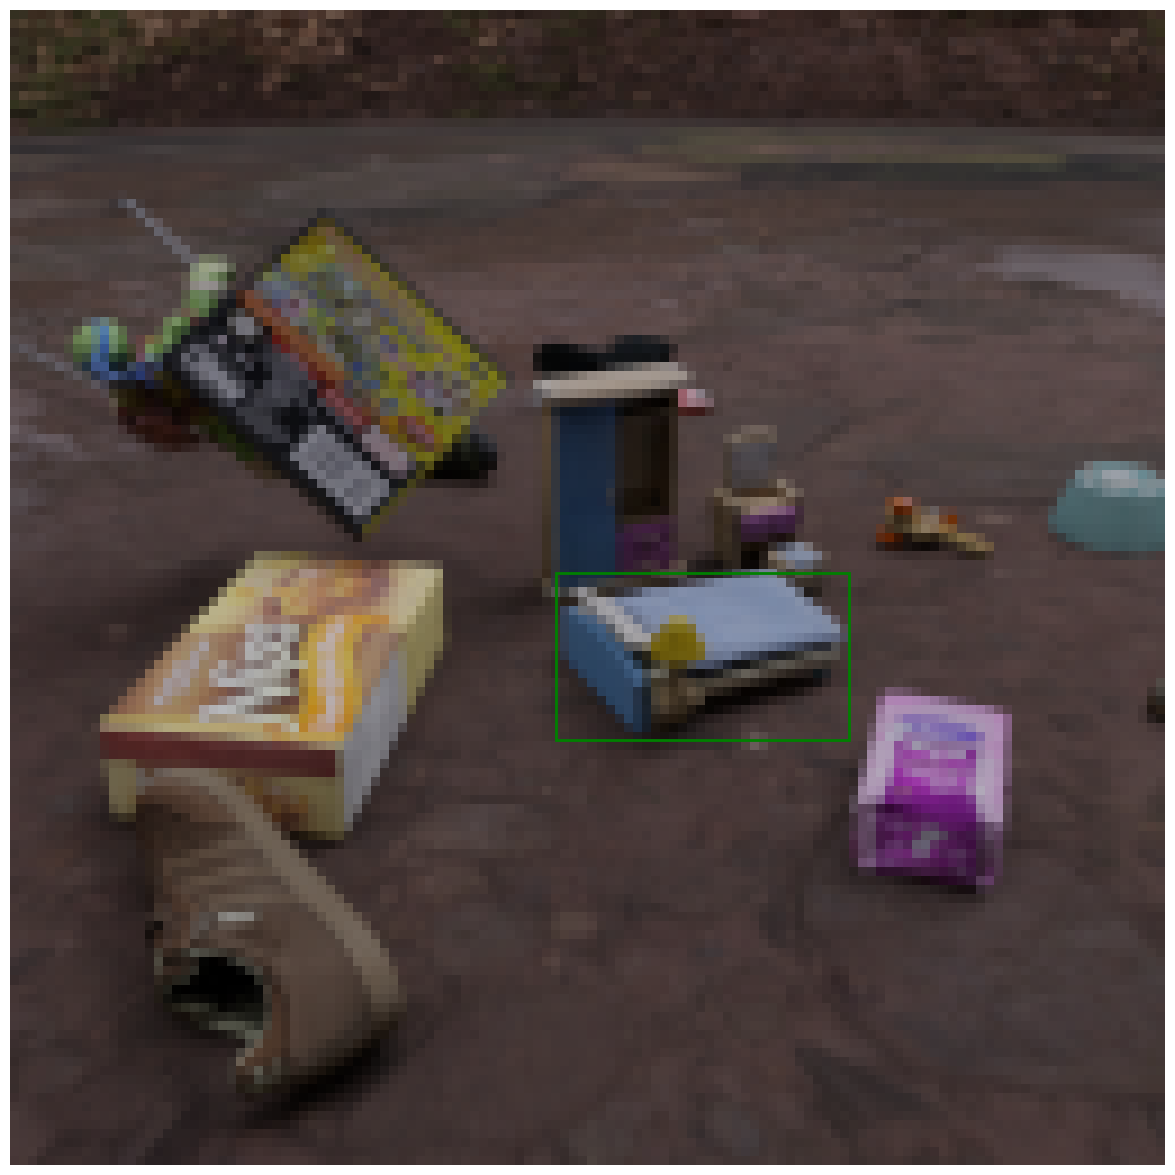

In [5]:
%matplotlib inline

data = np.load('data/MOVIE/videos/'+str(0)+'.npy')
masks = yolo_eval_batch( model, data, 0 )
show_yolo_mask(data[5],masks[5])

In [6]:
name = 'yolo_mask.mp4'
vid = cv2.VideoWriter(name,cv2.VideoWriter_fourcc(*'mp4v'), 12, (128,128))

data = np.load('data/MOVIE/videos/0.npy')

masks = yolo_eval_batch( model, data, 0 )

for image,mask in zip(data,masks):
    img = image.copy()
    for box in mask:
        img = cv2.rectangle(img, ( int(box[0]), int(box[1])), ( int(box[2]), int(box[3])), (255, 255, 255) , 2)
    vid.write(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
vid.release()    

0
(128, 128, 3)
0
(128, 128, 3)
1
(128, 128, 3)
1
(128, 128, 3)
2
(128, 128, 3)
1
(128, 128, 3)
2
(128, 128, 3)
2
(128, 128, 3)
2
(128, 128, 3)
3
(128, 128, 3)
1
(128, 128, 3)
0
(128, 128, 3)
0
(128, 128, 3)
2
(128, 128, 3)
3
(128, 128, 3)
3
(128, 128, 3)
4
(128, 128, 3)
5
(128, 128, 3)
5
(128, 128, 3)
2
(128, 128, 3)
2
(128, 128, 3)
3
(128, 128, 3)
1
(128, 128, 3)
1
(128, 128, 3)
